# Stocks dataset

This file uses pandas, matplotlib, seabord libraries for data processing and visualization. With the use of datareader I am able to import historical stock prices for selected tech companies

In [4]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data

%matplotlib inline

In [5]:
tickers = ['AAPL', 'MSFT', 'FB', 'NVDA', 'INTC', 'ORCL']
start_date = datetime.datetime(2013,1,1)
end_date = datetime.datetime(2021,12,31)

# Iterate through tickers to obtain stock prices for each day for every company.
# Then concatenate it into one shared dataframe.
frame_list = []
for tick in tickers:
    df = data.DataReader(tick, 'stooq', start_date, end_date)
    frame_list.append(df)
    
stocks = pd.concat(frame_list, axis = 1, keys = tickers)

In [6]:
# Change level names for better usage of dataframe. Also sort values in ascending order.
stocks.columns.names = ['Tickers', 'Stocks price']
stocks = stocks.sort_index(ascending = True)
stocks.head()

Tickers         AAPL                                       MSFT          \
Stocks price    Open    High     Low   Close     Volume    Open    High   
Date                                                                      
2013-01-02    17.108  17.144  16.732  16.962  647689316  22.721  23.122   
2013-01-03    16.916  16.982  16.713  16.747  407722774  23.040  23.057   
2013-01-04    16.588  16.640  16.244  16.282  686691830  22.737  22.796   
2013-01-07    16.127  16.350  15.916  16.184  559260301  22.317  22.414   
2013-01-08    16.348  16.431  16.103  16.228  529689335  22.302  22.335   

Tickers                                 ...    INTC                          \
Stocks price     Low   Close    Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2013-01-02    22.642  23.031  63445441  ...  16.307  16.481  16.229  16.481   
2013-01-03    22.649  22.721  57920148  ...  16.498  16.563  16.300  16.437   
2013-01-04    22.287  22.294  62981763  ...  16.458  16.490  16.229  16.313   
2013-01-07    22.211  22.257  44510773  ...  16.411  16.539  16.327  16.386   
2013-01-08    22.063  22.139  53600541  ...  16.369  16.621  16.206  16.262   

Tickers                   ORCL                                    
Stocks price    Volume    Open    High     Low   Close    Volume  
Date                                                              
2013-01-02    61770358  29.914  30.497  29.787  30.451  38459350  
2013-01-03    53249783  30.396  30.506  29.967  30.115  24857731  
2013-01-04    39101317  30.242  30.506  30.195  30.378  24706856  
2013-01-07    47153459  30.277  30.294  30.033  30.223  15958658  
2013-01-08    63127513  29.977  30.294  29.896  30.233  19832808  

[5 rows x 30 columns]

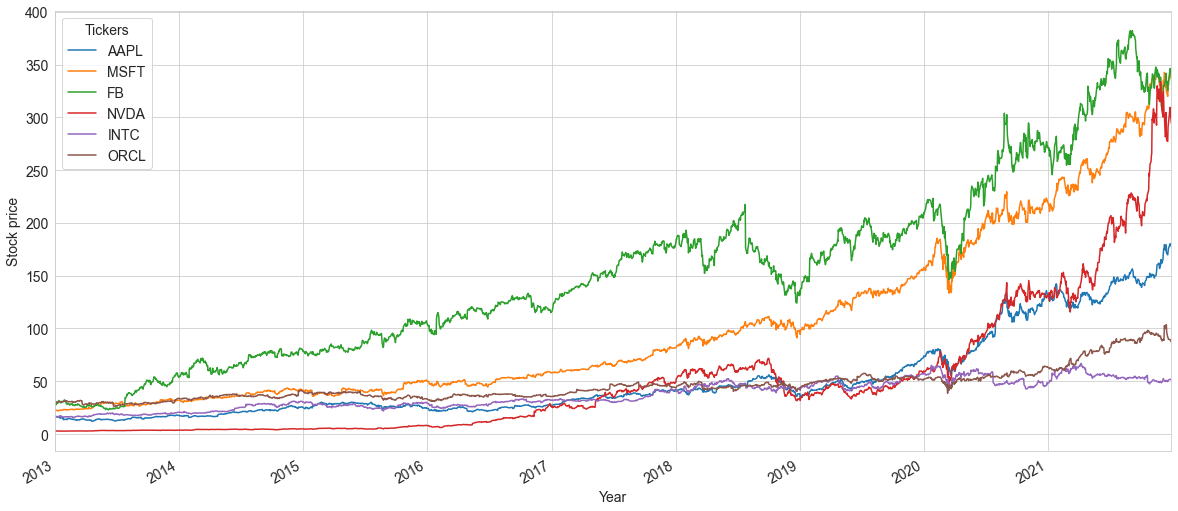

In [7]:
# Use plt to plot each company in 2013-2020 time period.
fig = plt.figure(figsize = (20,9))
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14

for tick in tickers:
    stocks[tick]['Close'].plot(label = tick)

plt.xlim('2013-01-01','2021-12-31')
plt.xlabel('Year')
plt.ylabel('Stock price')

plt.legend(title = 'Tickers')
plt.show()

Use pandas.DataFrame.xs() method to obtain some major information from particular level of MultiIndex.

In [14]:
# Max values for each company
stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').max()

Tickers
AAPL    180.330
MSFT    343.110
FB      382.180
NVDA    333.760
INTC     66.942
ORCL    103.650
dtype: float64

In [15]:
# Min values for each company
stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').min()

Tickers
AAPL    12.1340
MSFT    22.0630
FB      22.9000
NVDA     2.7691
INTC    15.7650
ORCL    26.3000
dtype: float64

# Note:
I am aware, that undermentioned code is not efficient, it reduces code readability and ziping together 5 lists isn't a good practice. However I used it just in this case so I can print everything together in 1 cell.


In [16]:
# Date with the lowest and the highest stocks price.
max_price = stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').max()
max_date = stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').idxmax()

min_price = stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').min()
min_date = stocks.xs(key = 'Close', axis = 1, level = 'Stocks price').idxmin()

In [17]:
for a,b,c,d,e in zip(tickers, min_price, min_date, max_price, max_date):
    print(f"{a} | Min: {np.round(b,2)} -- {str(c).split()[0]} | Max: {np.round(d,2)} -- {str(e).split()[0]}")

AAPL | Min: 12.13 -- 2013-04-19 | Max: 180.33 -- 2021-12-27
MSFT | Min: 22.06 -- 2013-01-10 | Max: 343.11 -- 2021-11-19
FB | Min: 22.9 -- 2013-06-05 | Max: 382.18 -- 2021-09-07
NVDA | Min: 2.77 -- 2013-01-15 | Max: 333.76 -- 2021-11-29
INTC | Min: 15.76 -- 2013-02-25 | Max: 66.94 -- 2021-04-09
ORCL | Min: 26.3 -- 2013-06-25 | Max: 103.65 -- 2021-12-15


Create a new DataFrame with percentage changes for each day during 2013-2020 period. This will allow to analyze profitability distribution.

In [18]:
returns = pd.DataFrame()

for tick in tickers:
    returns[f"{tick} return"] = stocks[tick]['Close'].pct_change()

In [19]:
returns.head()

,AAPL return,MSFT return,FB return,NVDA return,INTC return,ORCL return
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012675,-0.013460,-0.008214,0.000816,-0.002670,-0.011034
2013-01-04,-0.027766,-0.018793,0.035650,0.032722,-0.007544,0.008733
2013-01-07,-0.006019,-0.001660,0.022949,-0.028724,0.004475,-0.005102
2013-01-08,0.002719,-0.005302,-0.012237,-0.021816,-0.007567,0.000331


Display some basic information for each company:
1. Standard deviation
2. Maximum return rates
3. Minimum return rates
4. Date with the biggest profit
5. Date with the biggest loss

In [20]:
# 1
returns.std()

AAPL return    0.017765
MSFT return    0.016336
FB return      0.021383
NVDA return    0.026215
INTC return    0.018823
ORCL return    0.015749
dtype: float64

In [21]:
# 2
returns.max()

AAPL return    0.119798
MSFT return    0.142253
FB return      0.296115
NVDA return    0.298042
INTC return    0.195231
ORCL return    0.204296
dtype: float64

In [22]:
# 3
returns.min()

AAPL return   -0.128631
MSFT return   -0.147528
FB return     -0.189609
NVDA return   -0.187541
INTC return   -0.180408
ORCL return   -0.110066
dtype: float64

In [23]:
# 4
returns.idxmax()

AAPL return   2020-03-13
MSFT return   2020-03-13
FB return     2013-07-25
NVDA return   2016-11-11
INTC return   2020-03-13
ORCL return   2020-03-13
dtype: datetime64[ns]

In [24]:
# 5
returns.idxmin()

AAPL return   2020-03-16
MSFT return   2020-03-16
FB return     2018-07-26
NVDA return   2018-11-16
INTC return   2020-03-16
ORCL return   2020-03-12
dtype: datetime64[ns]

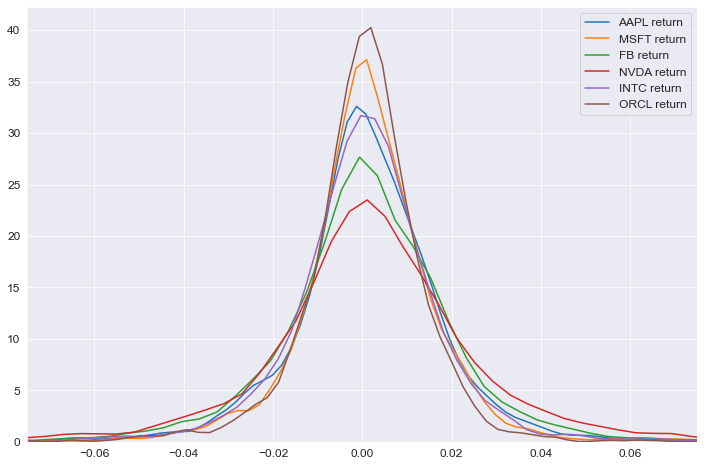

In [25]:
# Use seaborn kdeplot to compare distribution of return rates for each company.
# Part of outliers has been cut for better plot readability.
fig = plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12
plt.xlim(-0.075, 0.075)

for tick in tickers:
    sns.kdeplot(returns[f'{tick} return'])

Use seaborn distplot to plot distribution separately for each company

In [26]:
# Set style and font for plots
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 12

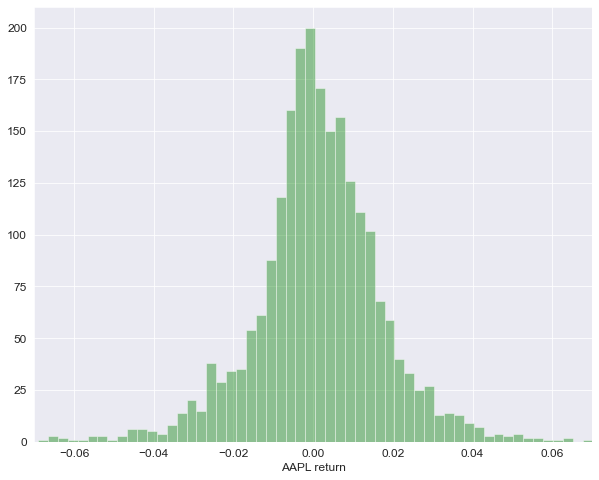

In [27]:
# Apple displayplot
plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['AAPL return'], bins = 100, kde = False, color='g')

plt.show()

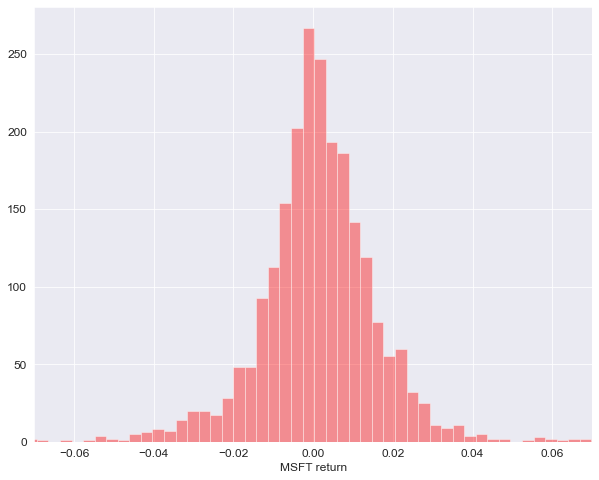

In [28]:
# Microsoft displayplot
plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['MSFT return'], bins = 100, kde = False, color='r')

plt.show()

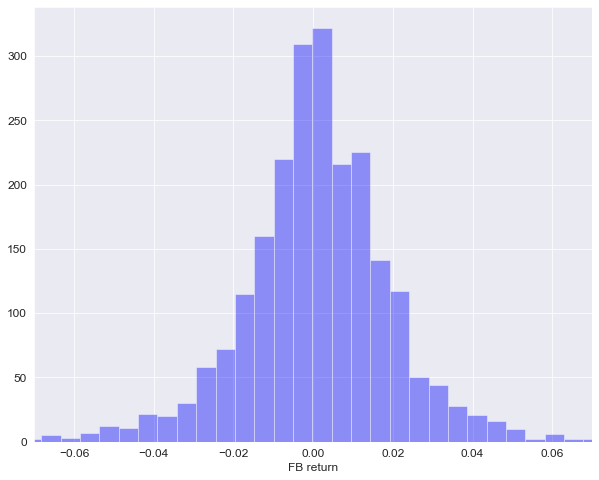

In [30]:
# FB displayplot
plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['FB return'], bins = 100, kde = False, color='b')

plt.show()

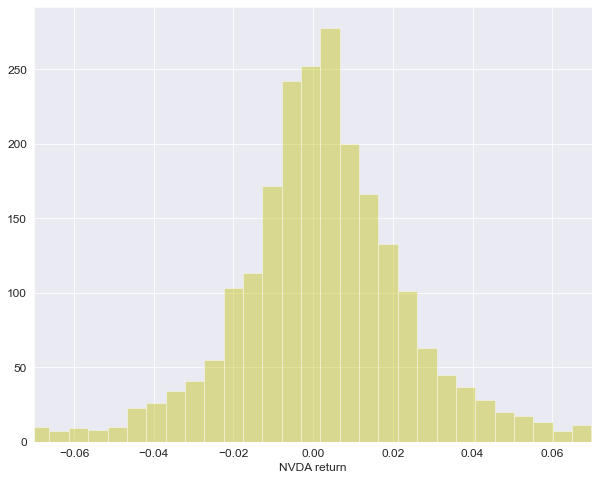

In [31]:
# NVDA displayplot
fig = plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['NVDA return'], bins = 100, kde = False, color='y')

plt.show()

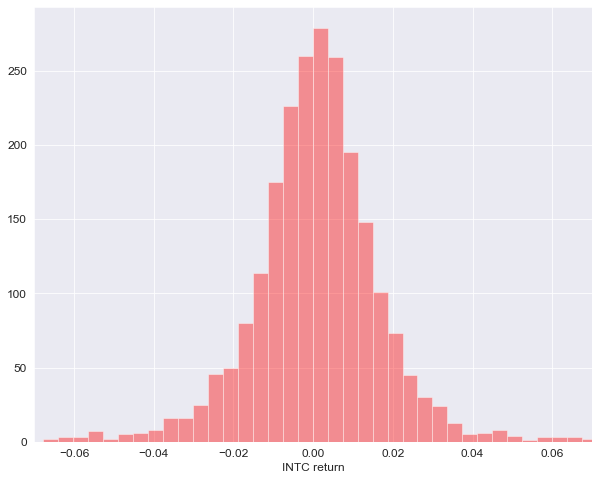

In [32]:
# INTC displayplot
plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['INTC return'], bins = 100, kde = False, color='r')

plt.show()

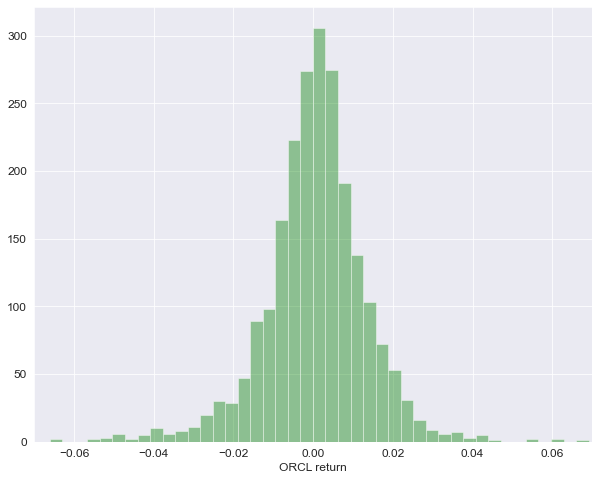

In [33]:
# ORCL displayplot
plt.figure(figsize = (10, 8))
plt.xlim(-0.07, 0.07 )
sns.distplot(returns['ORCL return'], bins = 100, kde = False, color='g')

plt.show()

Reset index and create columns for quarters and years so 'returns' dataframe can be used to vreate heatmaps

In [34]:
returns = returns.reset_index()

# Year columns
returns['year'] = returns['Date'].apply(lambda x: x.year)

# Quarter column
returns['quarter'] = returns['Date'].apply(lambda x: x.quarter)

In [35]:
returns.head()

,Date,AAPL return,MSFT return,FB return,NVDA return,INTC return,ORCL return,year,quarter
0,2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
1,2013-01-03,-0.012675,-0.013460,-0.008214,0.000816,-0.002670,-0.011034,2013,1
2,2013-01-04,-0.027766,-0.018793,0.035650,0.032722,-0.007544,0.008733,2013,1
3,2013-01-07,-0.006019,-0.001660,0.022949,-0.028724,0.004475,-0.005102,2013,1
4,2013-01-08,0.002719,-0.005302,-0.012237,-0.021816,-0.007567,0.000331,2013,1


Create 2 new DataFrames:
1. "byYear" with average return rates grouped by year.
2. "byQuart" with average return rates grouped by year and quarter.

In [36]:
byYear = returns.groupby('year').mean()
byYear = byYear.drop('quarter', axis = 1)
byYear * 100

,AAPL return,MSFT return,FB return,NVDA return,INTC return,ORCL return
year,,,,,,
2013,0.034564,0.145120,0.306438,0.109612,0.101361,0.053819
2014,0.144757,0.103772,0.166263,0.108564,0.155150,0.075808
2015,0.001929,0.096715,0.129666,0.226978,0.003121,-0.067707
2016,0.057383,0.065933,0.053043,0.511730,0.043465,0.033693
2017,0.163647,0.140510,0.176279,0.270605,0.112928,0.094916
2018,-0.005698,0.091106,-0.088657,-0.097331,0.039256,0.001035
2019,0.266420,0.188274,0.193313,0.259531,0.121027,0.077914
2020,0.280709,0.178404,0.154873,0.382756,-0.005753,0.117702
2021,0.130559,0.175547,0.099872,0.362792,0.042984,0.141219


In [37]:
byQuart = returns.groupby(['year', 'quarter']).mean()
byQuart * 100

AAPL return  MSFT return  FB return  NVDA return  INTC return  \
year quarter                                                                  
2013 1          -0.325699     0.076304  -0.127914     0.032958     0.062899   
     2          -0.139697     0.318289  -0.022167     0.161236     0.201691   
     3           0.313987    -0.023712   1.178369     0.173308    -0.063470   
     4           0.261520     0.204222   0.163531     0.064956     0.201318   
2014 1          -0.051736     0.171919   0.201290     0.201788     0.011647   
     2           0.324300     0.043770   0.205400     0.071988     0.306589   
     3           0.142082     0.179615   0.265392     0.012804     0.208324   
     4           0.157976     0.022044  -0.004777     0.151475     0.089678   
2015 1           0.217370    -0.190490   0.095663     0.096541    -0.215066   
     2           0.025579     0.156163   0.075765    -0.040654    -0.023940   
     3          -0.170543     0.030394   0.095176     0.355640     0.012587   
     4          -0.054223     0.378261   0.249624     0.486088     0.228254   
2016 1           0.083575     0.020947   0.178863     0.164515    -0.069842   
     2          -0.184290    -0.095634   0.013799     0.465225     0.042650   
     3           0.279941     0.199654   0.184759     0.607515     0.237839   
     4           0.051440     0.137778  -0.162725     0.797858    -0.043455   
2017 1           0.359416     0.105848   0.343979     0.061495     0.005824   
     2           0.017344     0.085985   0.102015     0.506283    -0.089779   
     3           0.120550     0.134979   0.203991     0.367359     0.207873   
     4           0.160384     0.234679   0.057792     0.143964     0.326095   
2018 1           0.006964     0.134272  -0.137636     0.338948     0.241791   
     2           0.168429     0.135396   0.321468     0.057685    -0.047208   
     3           0.329548     0.247303  -0.220765     0.285634    -0.055939   
     4          -0.530094    -0.151880  -0.325761    -1.060200     0.026183   
2019 1           0.333338     0.262374   0.417449     0.544350     0.247310   
     2           0.084421     0.217059   0.250878    -0.114150    -0.152912   
     3           0.213152     0.071415  -0.114074     0.125277     0.138528   
     4           0.435062     0.206172   0.230404     0.490159     0.252823   
2020 1          -0.141841     0.099749  -0.262029     0.328851    -0.015656   
     2           0.602313     0.432246   0.527361     0.634428     0.201909   
     3           0.415529     0.078142   0.252898     0.597193    -0.182796   
     4           0.238654     0.104988   0.094054    -0.027201    -0.023533   
2021 1          -0.111811     0.111756   0.145535     0.084300     0.459745   
     2           0.193261     0.231568   0.278746     0.670688    -0.185740   
     3           0.061552     0.070588  -0.025941     0.077524    -0.064216   
     4           0.368852     0.286162   0.006083     0.610414    -0.021892   

              ORCL return  
year quarter               
2013 1          -0.105150  
     2          -0.060859  
     3           0.132059  
     4           0.236807  
2014 1           0.117644  
     2          -0.003622  
     3          -0.079926  
     4           0.269856  
2015 1          -0.055901  
     2          -0.095027  
     3          -0.154090  
     4           0.034315  
2016 1           0.204037  
     2           0.014964  
     3          -0.054557  
     4          -0.022565  
2017 1           0.250872  
     2           0.199935  
     3          -0.044090  
     4          -0.024577  
2018 1          -0.027340  
     2          -0.040638  
     3           0.259365  
     4          -0.187486  
2019 1           0.296852  
     2           0.110553  
     3          -0.038196  
     4          -0.046778  
2020 1          -0.045374  
     2           0.239117  
     3           0.135852  
     4           0.138013  
2021 1           0.155886  
     2           0.182052  
   

Use new frames to create a heatmap. This will give us a good look into return rates across the specified time periods

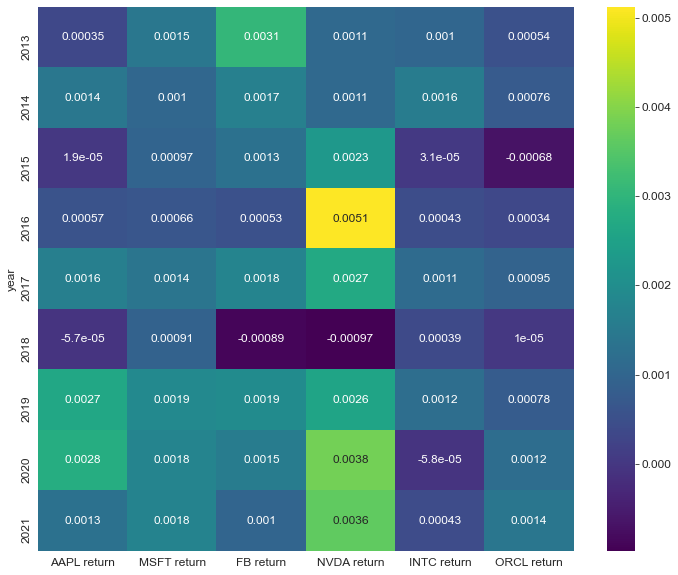

In [38]:
plt.figure(figsize = (12,10))

sns.heatmap(byYear, cmap='viridis', annot= True)
plt.show()

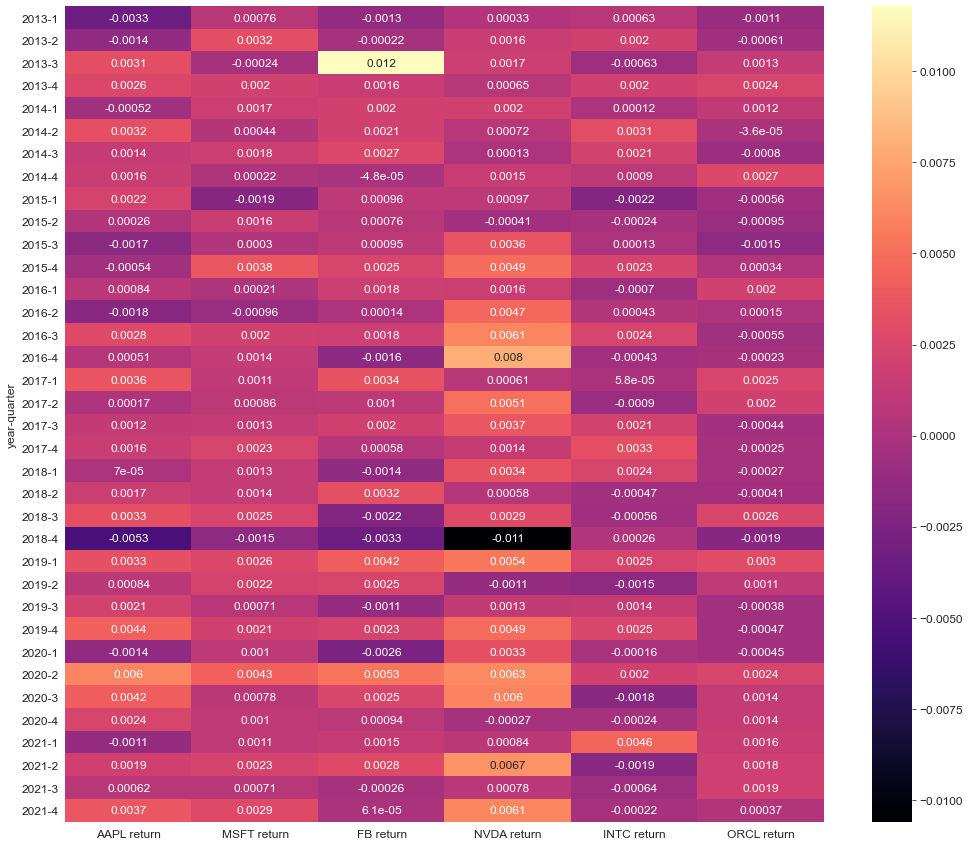

In [39]:
plt.figure(figsize = (17,15))

sns.heatmap(byQuart, cmap='magma', annot=True)
plt.show()